# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Our target variable(Dependent variable) is sales.

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


# Lets create a new independet variable for simple linear regression. (Feature Engineering)

In [7]:
df["total_spend"] = df["TV"] + df["radio"] + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [8]:
df = df.iloc[:, [3,1,2,4,0]]
df.head()

,sales,radio,newspaper,total_spend,TV
0,22.1,37.8,69.2,337.1,230.1
1,10.4,39.3,45.1,128.9,44.5
2,9.3,45.9,69.3,132.4,17.2
3,18.5,41.3,58.5,251.3,151.5
4,12.9,10.8,58.4,250.0,180.8


# Data Visulization

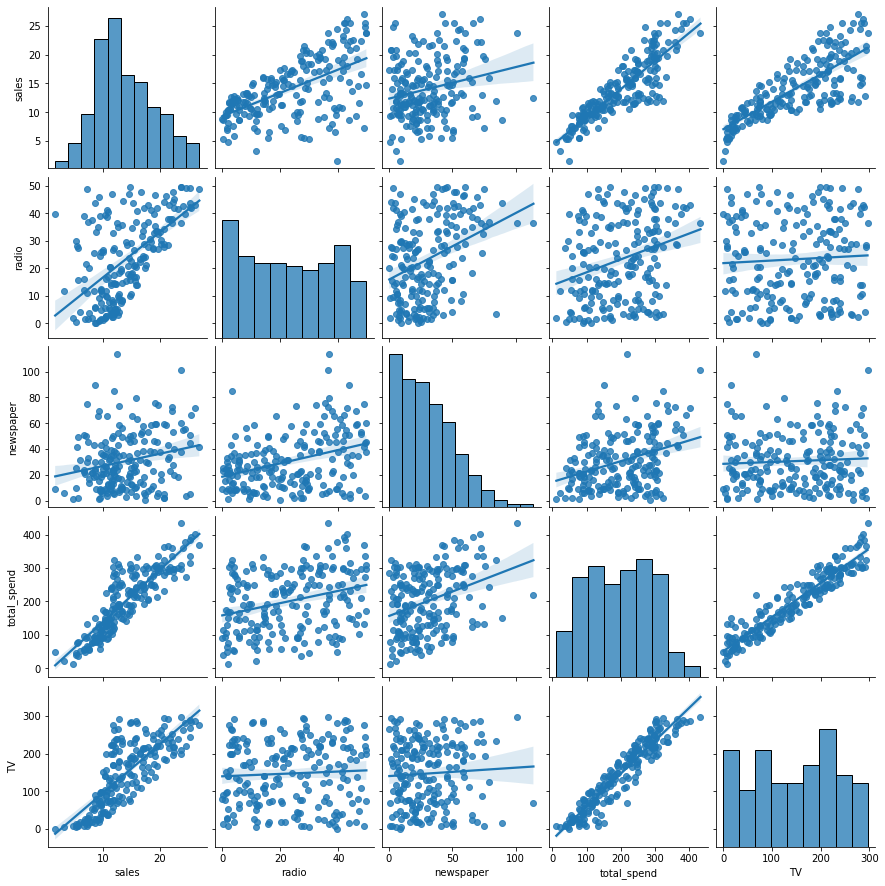

In [9]:
sns.pairplot(df , kind='reg');

In [10]:
df.corr()

,sales,radio,newspaper,total_spend,TV
sales,1.000000,0.576223,0.228299,0.867712,0.782224
radio,0.576223,1.000000,0.354104,0.293211,0.054809
newspaper,0.228299,0.354104,1.000000,0.343059,0.056648
total_spend,0.867712,0.293211,0.343059,1.000000,0.945330
TV,0.782224,0.054809,0.056648,0.945330,1.000000


In [11]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i} : {df.sales.corr(df[i])}")

corr between sales and radio : 0.5762225745710552
corr between sales and newspaper : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017418
corr between sales and TV : 0.7822244248616066


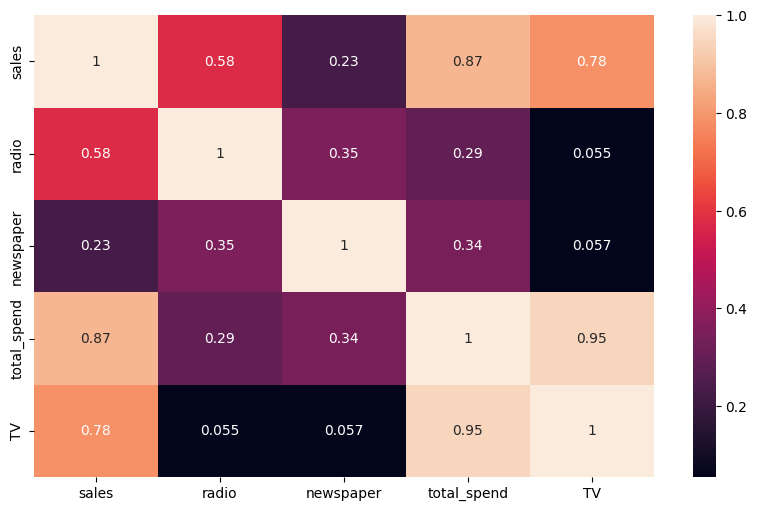

In [12]:
sns.heatmap(df.corr() , annot = True);

In [13]:
df.corr()["sales"].sort_values(ascending=False)

sales          1.000000
total_spend    0.867712
TV             0.782224
radio          0.576223
newspaper      0.228299
Name: sales, dtype: float64

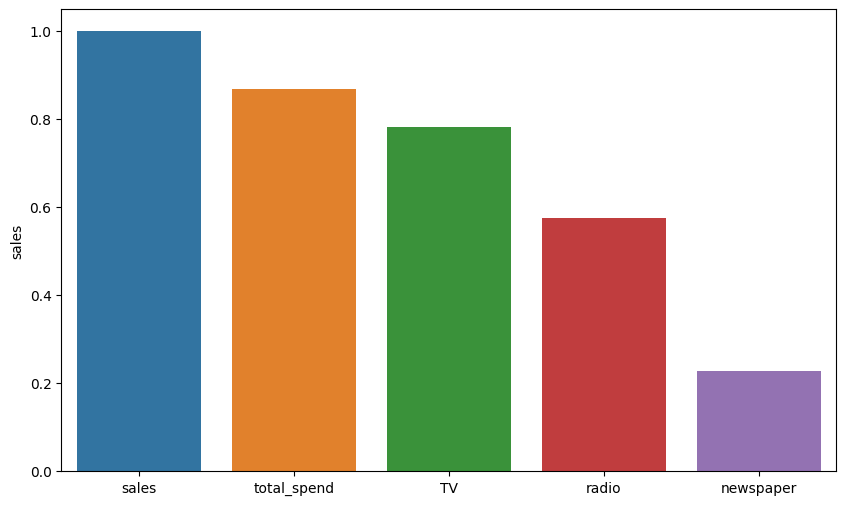

In [14]:
sns.barplot(x = df.corr()["sales"].sort_values(ascending = False).index , y = df.corr()["sales"].sort_values(ascending=False));

In [15]:
df = df[["total_spend" , "sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


In [16]:
corr_rate = df.sales.corr(df.total_spend)
corr_rate

0.8677123027017418

In [17]:
r2_score = corr_rate**2   # Coefficient of determination(R2)
r2_score

0.7529246402599592

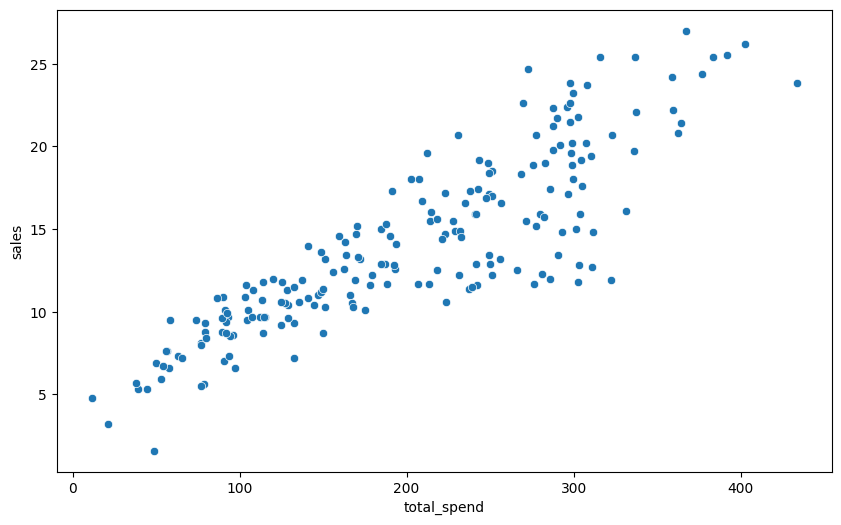

In [18]:
sns.scatterplot(x = df["total_spend"] , y = df["sales"] );

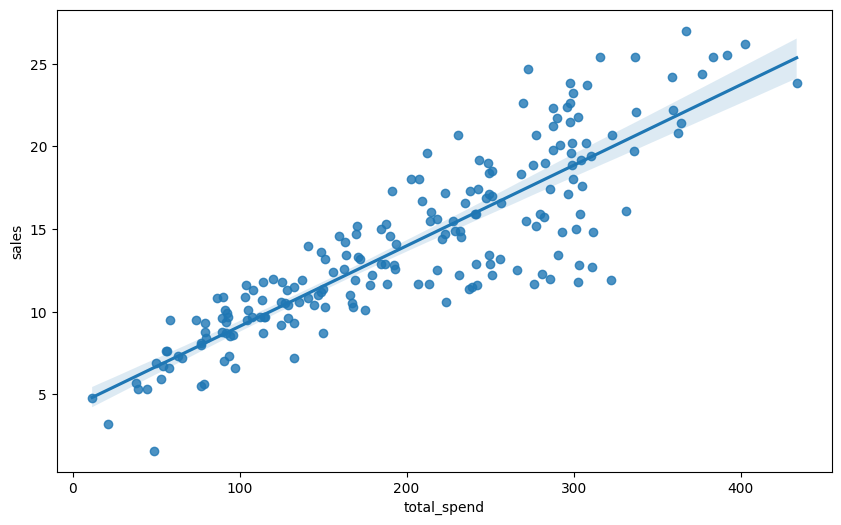

In [19]:
sns.regplot(x = df["total_spend"] , y = df["sales"] );

# Train-Test-Split time

In [20]:
# from sklearn.model_selection import train_test_split

# X = df.drop("sales" , axis = 1)
# y = df["sales"]

# X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state=15 )

In [21]:
from sklearn.model_selection import train_test_split

X = df["total_spend"]
y = df["sales"]

# X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.1 , random_state=15 )

# X_train = np.array(X_train).reshape(-1,1)
# X_test = np.array(X_test).reshape(-1,1)

# y_train = np.array(X_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)

In [22]:
# X_train.shape

In [23]:
np.polyfit(X , y, deg = 1)  # deg = 1 because linear regression.
# First result slope , second intercept(bias). # We don't need that actually. Sklearn will do this.

array([0.04868788, 4.24302822])

In [24]:
# slope , intercept = np.polyfit(X , y , deg = 1 )

In [25]:
b1, b0 = np.polyfit(X , y , deg = 1 ) # We will create our own equation. We got b1 and b0 values now.

In [26]:
y_pred = b1*X + b0
y_pred

0      20.655712
1      10.518896
2      10.689303
3      16.478292
4      16.414998
         ...    
195     6.954943
196     9.462369
197    13.625183
198    23.318939
199    16.385785
Name: total_spend, Length: 200, dtype: float64

In [27]:
values = {"actual": y, "predicted":y_pred, "resudial": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [28]:
df_2.resudial.sum() # Its like 0 but our sum of errors not 0.

8.810729923425242e-13

In [29]:
df_2.LSE.sum() # As you see when we look sum of LSE, its not 0. Minimum 1338.

1338.4439761715594

# Prediction with simple linear regression

In [30]:
potential_spends = np.linspace(0, 500, 100) # potential spends
potential_spends

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [31]:
predicted_sales_lin = b1 * potential_spends + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

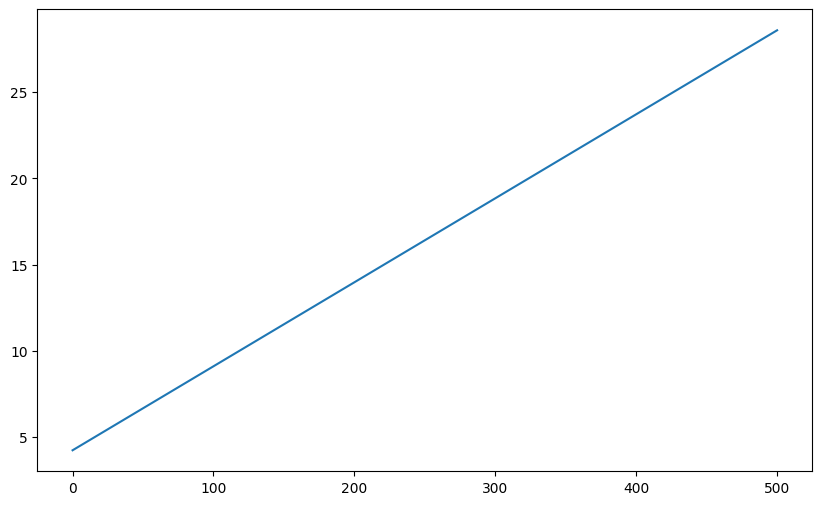

In [32]:
plt.plot(potential_spends, predicted_sales_lin);

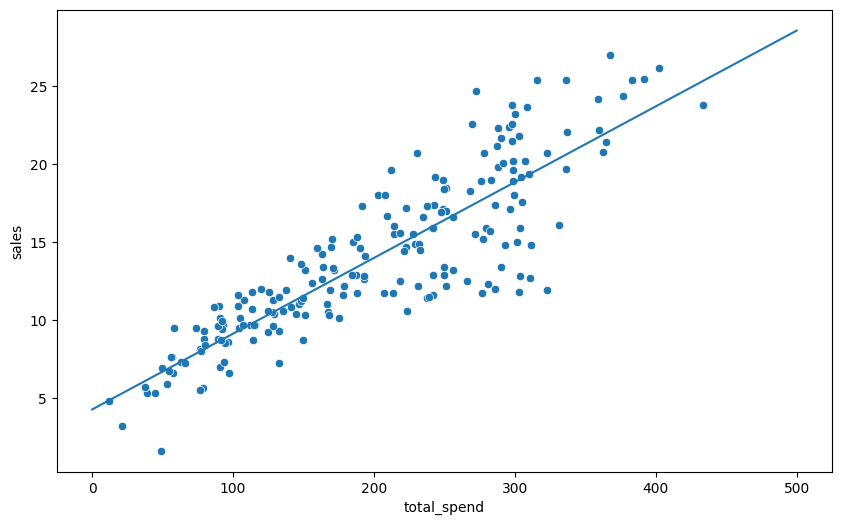

In [33]:
plt.plot(potential_spends, predicted_sales_lin);

sns.scatterplot(x = df["total_spend"], y = df["sales"]);

In [34]:
# Manuel model done !

# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=42)

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)


# Lets do Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

# Create a model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

# Fit our model

In [43]:
lr.fit(X_train , y_train)

LinearRegression()

# Test our model

In [44]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score 

In [45]:
train_preds = lr.predict(X_train)

print(mean_absolute_error(y_train , train_preds))
print(mean_squared_error(y_train , train_preds))
print(r2_score(y_train , train_preds))

1.9639767578200755
6.811655464246885
0.7404192834391546


In [46]:
test_preds = lr.predict(X_test)

print(mean_absolute_error(y_test , test_preds))
print(mean_squared_error(y_test , test_preds))
print(r2_score(y_test , test_preds))


1.914362736813055
6.415866312543217
0.7650262463310723


# 

In [47]:
# Done